In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [157]:
coltypes = {'cbsa': 'str',
              'tot_opioid_prescriptions': 'int', 
              'prescribing_year': 'str',
              'outcome_year': 'str',
              'num_admissions':'int',
              'num_od_deaths':'int',
              'num_heroin_admissions':'int',
              'prior_year_prescribing':'int',
              'prior_heroin_admissions': 'int',
              'prior_admissions':'int',
              'prior_od_deaths': 'int',
              'rx_change_rate': 'float',
              'heroin_ad_change_rate':'float',
              'od_death_change_rate': 'float'
              }
cols = list(coltypes.keys())

In [158]:
df = pd.read_csv("clean_dataset.csv", usecols=cols, dtype=coltypes)

In [159]:
df.head()

,cbsa,tot_opioid_prescriptions,prescribing_year,outcome_year,num_admissions,num_od_deaths,num_heroin_admissions,prior_year_prescribing,prior_heroin_admissions,prior_admissions,prior_od_deaths,rx_change_rate,heroin_ad_change_rate,od_death_change_rate
0,10180,162425,2015,2016,118,17,150,183262,118,158,18,-0.113701,0.271186,-0.055556
1,10180,183262,2014,2015,158,18,118,189241,114,197,15,-0.031595,0.035088,0.200000
2,10180,189241,2013,2014,197,15,114,195280,145,197,10,-0.030925,-0.213793,0.500000
3,10420,571827,2015,2016,325,342,519,605620,522,383,207,-0.055799,-0.005747,0.652174
4,10420,605620,2014,2015,383,207,522,624956,658,450,148,-0.030940,-0.206687,0.398649


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 14 columns):
cbsa                        549 non-null object
tot_opioid_prescriptions    549 non-null int32
prescribing_year            549 non-null object
outcome_year                549 non-null object
num_admissions              549 non-null int32
num_od_deaths               549 non-null int32
num_heroin_admissions       549 non-null int32
prior_year_prescribing      549 non-null int32
prior_heroin_admissions     549 non-null int32
prior_admissions            549 non-null int32
prior_od_deaths             549 non-null int32
rx_change_rate              549 non-null float64
heroin_ad_change_rate       543 non-null float64
od_death_change_rate        549 non-null float64
dtypes: float64(3), int32(8), object(3)
memory usage: 43.0+ KB


In [163]:
def drop(column):
    df.drop(column, axis=1, inplace=True)
    
drop('heroin_ad_change_rate')
drop('rx_change_rate')
drop('od_death_change_rate')

In [164]:
#standardize the data to mean 0
from sklearn import preprocessing

# Get column names first
names = df.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.drop('cbsa', axis=1, inplace=True)
#scaled_df.drop('prescribing_year', axis=1, inplace=True)
scaled_df.drop('outcome_year', axis=1, inplace=True)

In [125]:
scaled_df.head()

,tot_opioid_prescriptions,prescribing_year,outcome_year,num_admissions,num_od_deaths,num_heroin_admissions,prior_year_prescribing,prior_heroin_admissions,prior_admissions,prior_od_deaths
0,-0.680925,1.224745,1.224745,-0.516881,-0.652924,-0.438424,-0.655553,-0.450381,-0.486627,-0.649905
1,-0.643385,0.000000,0.000000,-0.457519,-0.645887,-0.456880,-0.645213,-0.452794,-0.432703,-0.675773
2,-0.632613,-1.224745,-1.224745,-0.399641,-0.666997,-0.459187,-0.634769,-0.434092,-0.432703,-0.718887
3,0.056657,1.224745,1.224745,-0.209682,1.633995,-0.225605,0.074906,-0.206643,-0.175529,0.979782
4,0.117538,0.000000,0.000000,-0.123606,0.684044,-0.223875,0.108347,-0.124593,-0.082891,0.471043


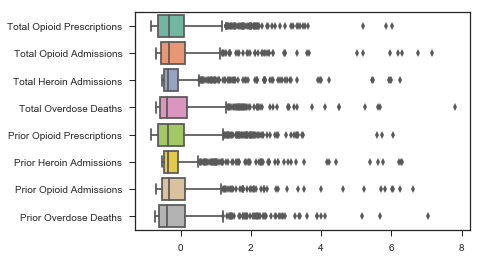

In [133]:
#scaled_df['Total Opioid Prescriptions'] = scaled_df['tot_opioid_prescriptions']
#scaled_df.drop('tot_opioid_prescriptions', axis=1, inplace=True)
#scaled_df['Total Opioid Admissions'] = scaled_df['num_admissions']
#scaled_df.drop('num_admissions', axis=1, inplace=True)
scaled_df['Total Heroin Admissions'] = scaled_df['num_heroin_admissions']
scaled_df.drop('num_heroin_admissions', axis=1, inplace=True)
scaled_df['Total Overdose Deaths'] = scaled_df['num_od_deaths']
scaled_df.drop('num_od_deaths', axis=1, inplace=True)
scaled_df['Prior Opioid Prescriptions'] = scaled_df['prior_year_prescribing']
scaled_df.drop('prior_year_prescribing', axis=1, inplace=True)
scaled_df['Prior Heroin Admissions'] = scaled_df['prior_heroin_admissions']
scaled_df.drop('prior_heroin_admissions', axis=1, inplace=True)
scaled_df['Prior Opioid Admissions'] = scaled_df['prior_admissions']
scaled_df.drop('prior_admissions', axis=1, inplace=True)
scaled_df['Prior Overdose Deaths'] = scaled_df['prior_od_deaths']
scaled_df.drop('prior_od_deaths', axis=1, inplace=True)
ax = sns.boxplot(data=scaled_df, orient="h", palette="Set2")

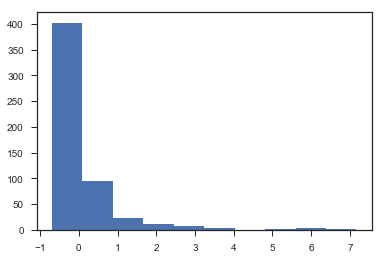

In [136]:
plt.hist(scaled_df['Total Opioid Admissions'])
plt.show()

In [142]:
from scipy import stats
np.random.seed(12345678)
x = scaled_df['Total Opioid Prescriptions']
print(stats.shapiro(x))

(0.7309080362319946, 7.87695597234036e-29)


In [152]:
from scipy.stats import shapiro
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
plotly.tools.set_credentials_file(username='rmdewolf', api_key='Agp934TbndYHvzQW1GHc')
x = scaled_df['Total Opioid Prescriptions']
stat, p = shapiro(x)

# interpret
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian'
else:
    msg = 'Sample does not look Gaussian'

result_mat = [
    ['Length of the sample data', 'Test Statistic', 'p-value', 'Comments'],
    [len(x), stat, p, msg]
]

swt_table = ff.create_table(result_mat)
swt_table['data'][0].colorscale=[[0, '#2a3f5f'],[1, '#ffffff']]
swt_table['layout']['height']=200
swt_table['layout']['margin']['t']=50
swt_table['layout']['margin']['b']=50

py.iplot(swt_table, filename='shapiro-wilk-table')

In [178]:
stats = pd.DataFrame(df.describe())
stats['tot_opioid_prescriptions'] = stats['tot_opioid_prescriptions'].astype(int)
stats['Total Opioid Prescriptions'] = stats['tot_opioid_prescriptions']
stats['num_admissions'] = stats['num_admissions'].astype(int)
stats['Total Opioid Admissions'] = stats['num_admissions']
stats['num_od_deaths'] = stats['num_od_deaths'].astype(int)
stats['Total Overdose Deaths'] = stats['num_od_deaths']
stats['num_heroin_admissions'] = stats['num_heroin_admissions'].astype(int)
stats['Total Heroin Admissions'] = stats['num_heroin_admissions']
#drop the categorical columns to scale and create a scatterplot matrix
def drop(column):
    stats.drop(column, axis=1, inplace=True)
    

#drop('heroin_ad_change_rate')
#drop('rx_change_rate')
#drop('od_death_change_rate')
drop('prior_year_prescribing')
drop('prior_heroin_admissions')
drop('prior_admissions')
drop('prior_od_deaths')
drop('tot_opioid_prescriptions')
drop('num_admissions')
drop('num_heroin_admissions')
drop('num_od_deaths')

stats

,Total Opioid Prescriptions,Total Opioid Admissions,Total Overdose Deaths,Total Heroin Admissions
count,549,549,549,549
mean,540379,466,109,910
std,555566,674,142,1735
min,67268,1,10,0
25%,183993,88,26,70
50%,352019,253,55,308
75%,594589,554,135,773
max,3875284,5297,1220,11738


In [75]:
#standardize the data to mean 0
from sklearn import preprocessing

# Get column names first
names = stats.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaled_stats = scaler.fit_transform(stats)
scaled_stats = pd.DataFrame(scaled_stats, columns=names)

In [48]:
#drop the categorical columns to scale and create a scatterplot matrix
def drop(column):
    df.drop(column, axis=1, inplace=True)
    
#drop('cbsa')
#drop('outcome_year')
#drop('heroin_ad_change_rate')
#drop('rx_change_rate')
#drop('od_death_change_rate')

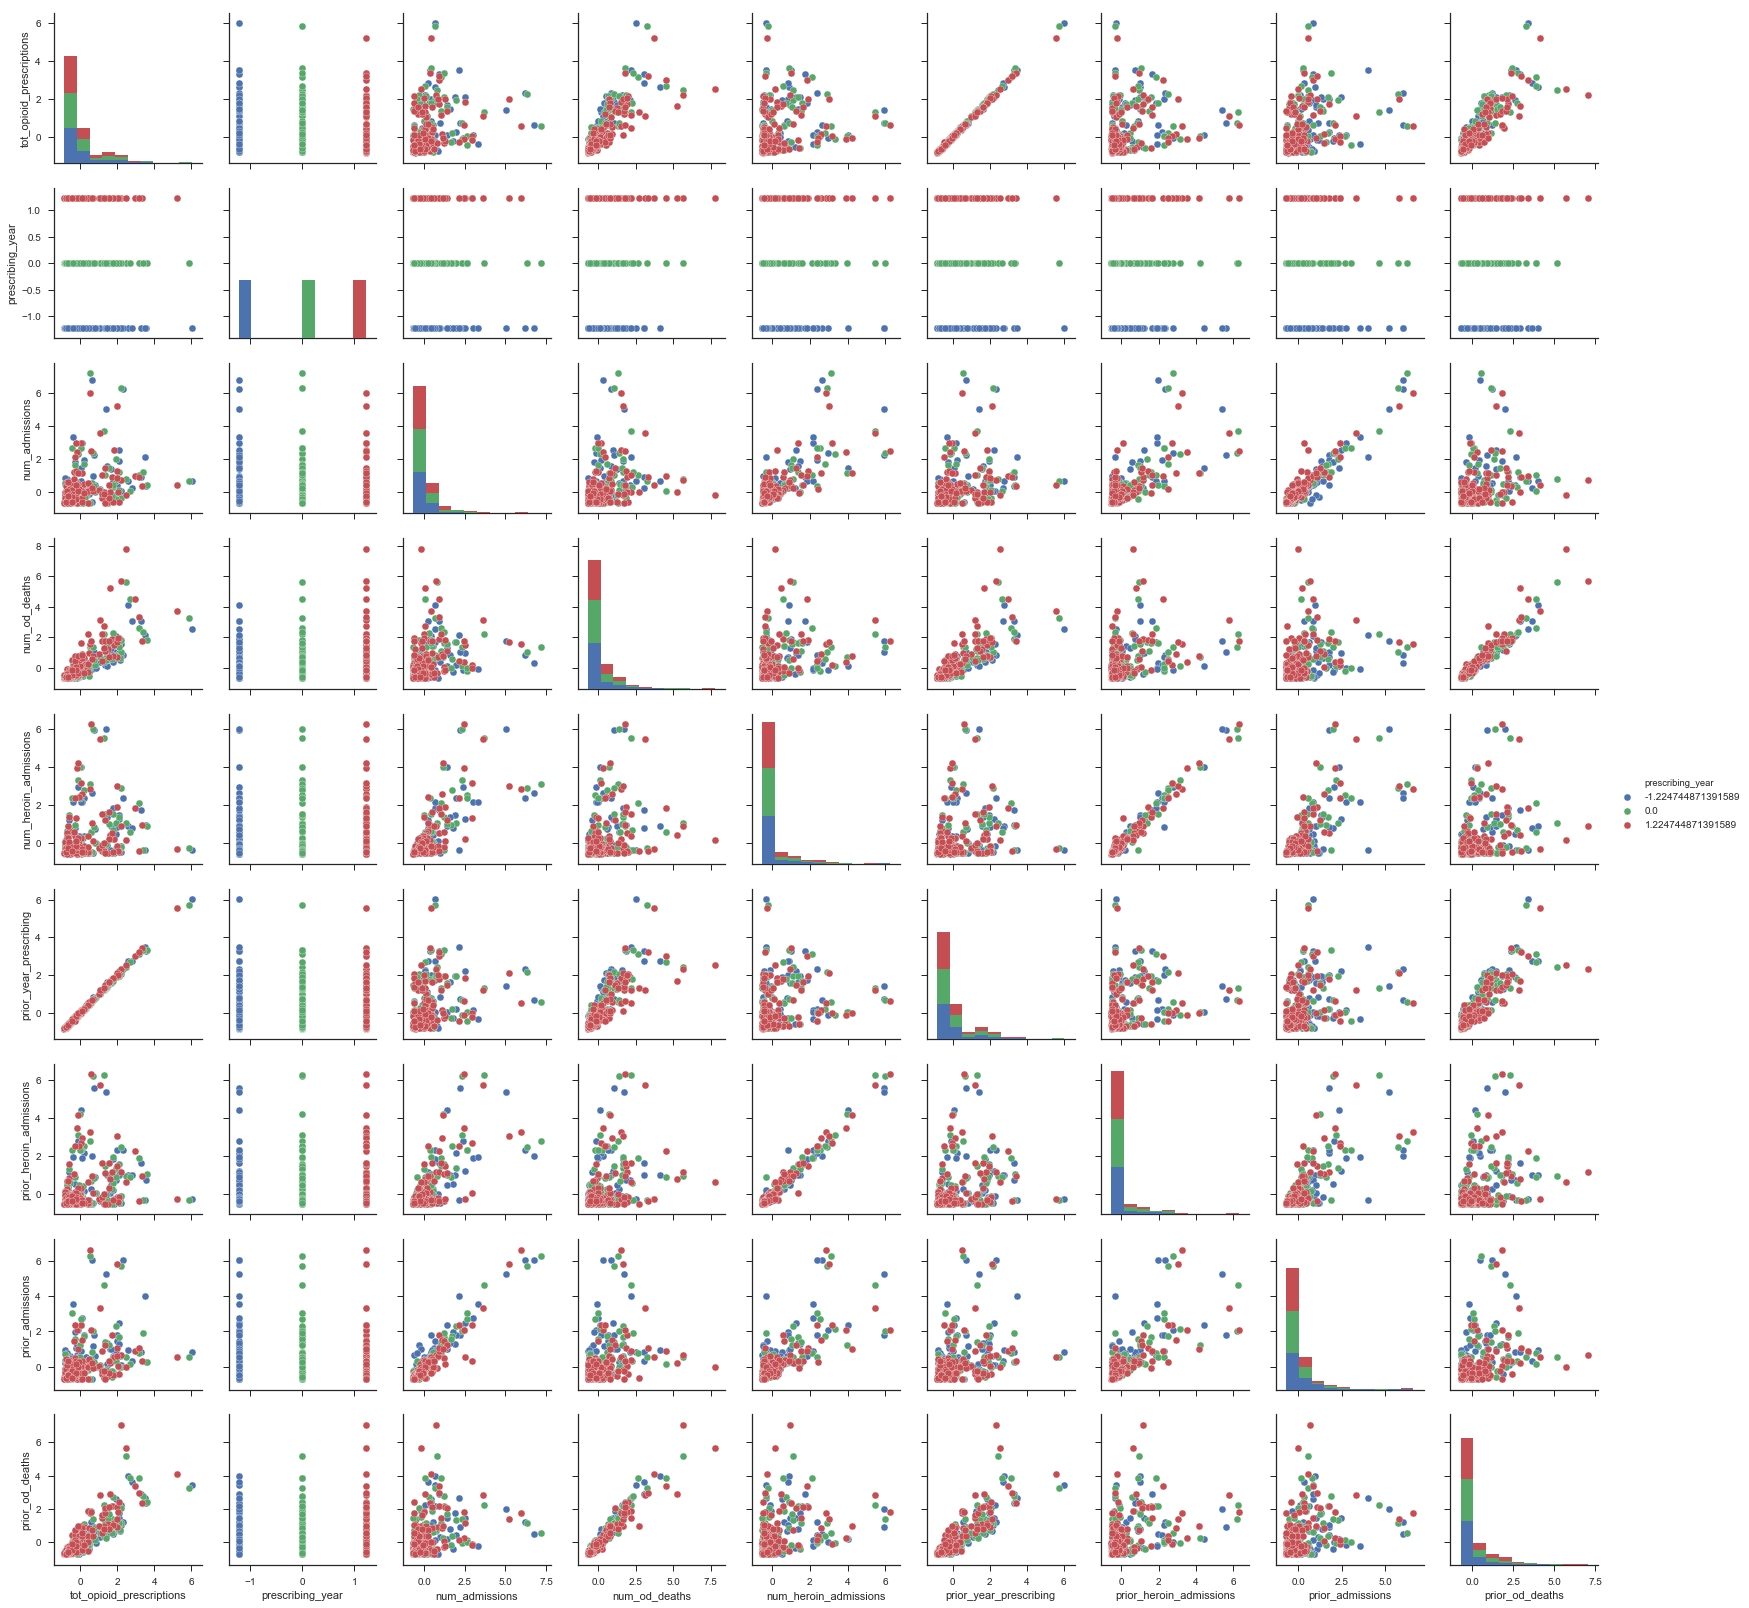

In [175]:
#create scatterplot matrix
import seaborn as sns
sns.set(style="ticks")

svm=sns.pairplot(scaled_df, hue="prescribing_year")
svm.savefig("output.png")